<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-1-/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/AirBnB/AirBnB Bookings Analysis/Airbnb NYC 2019.csv")

In [ ]:
df.info()

**DATA CLEANING:**
Checking whether same host id is present multiple times

In [ ]:
df.isnull().sum()

In [ ]:
df['id'].duplicated().unique() #Host id dupicate has only 1 unique value i.e false. Hence no multiple data with same id exists

In [ ]:
df['id'].isnull().unique()#No null value in id

In [ ]:
print(df['host_name'].isnull().unique())#Host name has null values
name_null=df[df['host_name'].isnull()==True]
name_null['id'].shape[0]# 21 entries with name as null
s=df.name.fillna(df.host_id,inplace=True)#Replace the null host name with the host id
df.name.isnull().unique()

In [ ]:
df1=df.copy()
print("Price null values:",df1['price'].isnull().unique())
print("Minimum nights null values:",df1['minimum_nights'].isnull().unique())
print("Number of reviews null values:",df1['number_of_reviews'].isnull().unique())
print("Last review null values:",df1['last_review'].isnull().unique())
df1['last_review'].fillna(0,inplace=True)
print("Reviews per month null values:",df1['reviews_per_month'].isnull().unique())
df1['reviews_per_month'].fillna(0,inplace=True)


**1. About Host and Area**

In [ ]:
df1['host_name'].nunique() #11452 Hosts are present in the data

In [ ]:
h=df1['host_name'].value_counts()
plt.figure(figsize=(12,6))
h[0:10].plot.bar()

THESE ARE THE NAME OF THE TOP 10 HOST

In [ ]:
df1.loc[df1['host_name'] == 'Michael', 'neighbourhood_group'].unique()  # Host name with Michael provides the maximum number of Rooms in different neighbour group

In [ ]:
count=df1.neighbourhood_group.value_counts()
count

In [ ]:
count.plot(kind="pie",autopct='%0.1f%%')

In [ ]:
plt.figure(figsize=(12,5))
count.plot.bar()

THE ABOVE GRAPHICAL REPRESENTATIONS SHOW THAT THE HIGHEST NUMBER OF HOSTS ARE FROM MANHATTAN FOLLWED BY BROOKLY AND ETC. 
THE LEAST NUMBER OF HOSTS ARE FROM STATEN ISLAND

**2.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

Price and Availability

In [ ]:
df1['minimum_price']=df1['minimum_nights']*df1['price']
df1[['minimum_price']].describe()
df2=df1.query('minimum_price == 0')
df2.shape[0]  #There are 11 rows with minimum price as 0
df3=df1.groupby(['neighbourhood_group']).agg({'price':'mean','availability_365':'mean'})#Mean price and mean availability of each neighbourhood group
plt.figure(figsize=(10,5))
df3.plot.bar()

**SO ACCORDING TO THE GRAPH ABOVE, THE AVERAGE PRICE AND AVERAGE AVAILABILITY IN *BRONX*,*QUEENS* AND *STATEN* *ISLAND* SUITED BEST FOR A CUSTOMER WHEREAS IN *BROOKLY* THE AVERAGE PRICE IS MORE AND AVERAGE AVAILABILTY IS THE LEAST AND IN *MANHATTAN* THE AVERAGE PRICE IS THE HIGHEST AND AVERAGE AVAILABILITY IS THE SECOND LEAST**

Reviews Analysis

In [ ]:
rev=df1.groupby(['neighbourhood_group']).agg({'reviews_per_month':"mean"})
rev1=rev.sort_values('reviews_per_month', ascending=False)
fig=plt.figure(figsize=(10,5))
plt.title("Average Reviews Per Month")
plt.plot(rev)
plt.title("Average price")

In [ ]:
rev1

AS WE CAN OBSERVE FROM THE ABOVE TABLE AND THE GRAPH THE CUSTOMER REVIEW PER MONTH IS MORE IN STATEN ISLAND FOLLOWED BY QUEENS AND THEN BRONX WHICH MEANS CUSTOMERS ARE MORE INCLINED TOWARDS THESE PLACES AND THE REASON IS THE LOWER AVERAGE PRICE AND HIGHER AVERAGE AVAILABILITY.
MANHATTAN IS THE COSTLIEST AND WITH THE LEAST AVERAGE AVAILABILITY AND IS FOLLOWED BY BROOKLYN.


In [ ]:
df1.groupby(['neighbourhood_group']).agg({'neighbourhood':'items'})#Neighbour hood of Particular neighbourhood group

In [ ]:
p=df1.groupby(['neighbourhood_group','name']).agg({'availability_365':"min"})
p
# These are the busiest places since the availability is the least

**3.Which hosts are the busiest and why?**

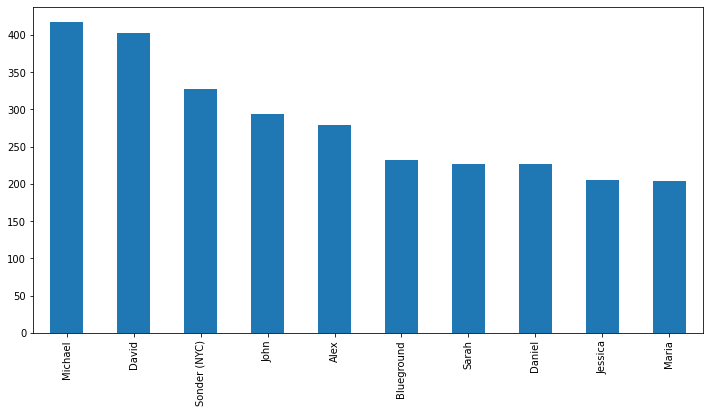

In [ ]:
h=df1['host_name'].value_counts()
plt.figure(figsize=(12,6))
h[0:10].plot.bar() #Host Michael is the busiest follwed by David

In [ ]:
m=df[df1['host_name']=="Michael"]
d=df[df1['host_name']=="David"]
print("Total places hosted by Michael is:",m.shape[0])
print("Total places hosted by David is:",d.shape[0])
#Since Michael and David host more than 400 places they are the busiest

Total places hosted by Michael is: 417
Total places hosted by David is: 403


**4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**